# Modèle de classement des textos en spam

Dans ce cas pratique on cherche à entraîner un modèle capable de prédire si un texto est un spam ou non. On s'appuie pour cela sur une base de données contenant des sms labellisés comme spam ou non spam (trouvée sur https://archive.ics.uci.edu/ml/datasets.php, voir readme pour plus d'informations).  

- Importez la base de données dans un dataframe 

In [1]:
import numpy as np
import pandas as pd
import re
import string

pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', None) # Permet d'afficher toutes les colonnes en indiquant None
pd.set_option('display.max_rows', None) # Permet d'afficher toutes les lignes en indiquant None

In [2]:
sms = pd.read_table('./smsspamcollection/SMSSpamCollection.txt', header= None)
sms.head()

0  \
0  ham    
1  ham    
2  spam   
3  ham    
4  ham    

                                                                                                                                                             1  
0  Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...                                              
1  Ok lar... Joking wif u oni...                                                                                                                                
2  Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's  
3  U dun say so early hor... U c already then say...                                                                                                            
4  Nah I don't think he goes to usf, he lives around here though

In [3]:
# On renomme les colonnes
sms.columns = ['target','text']
sms.head()

target  \
0  ham     
1  ham     
2  spam    
3  ham     
4  ham     

                                                                                                                                                          text  
0  Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...                                              
1  Ok lar... Joking wif u oni...                                                                                                                                
2  Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's  
3  U dun say so early hor... U c already then say...                                                                                                            
4  Nah I don't think he goes to usf, he lives around here though

- Appliquez les transformations usuelles du texte pour faciliter l'analyse textuelle

In [4]:
import nltk.corpus
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\utilisateur\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

def  clean_sms(df, text_field):
    df[text_field] = df[text_field].str.lower()
    df[text_field] = df[text_field].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
    #df[text_field] = df[text_field].apply(lambda elem: re.sub(f'[{string.punctuation}\n]', ' ', elem))
    
    return df

data_clean = clean_sms(sms, "text")
data_clean.head()

target  \
0  ham     
1  ham     
2  spam    
3  ham     
4  ham     

                                                                                                                                            text  
0  go jurong point, crazy.. available bugis n great world la e buffet... cine got amore wat...                                                    
1  ok lar... joking wif u oni...                                                                                                                  
2  free entry 2 wkly comp win fa cup final tkts 21st may 2005. text fa 87121 receive entry question(std txt rate)t&c's apply 08452810075over18's  
3  u dun say early hor... u c already say...                                                                                                      
4  nah think goes usf, lives around though

- Faites une matrice de termes et affichez les termes les plus fréquents dans chaque catégorie : spam ou non spam. Si nécessaire, enrichissez la liste de stop-words pour limiter la taille de la matrice.

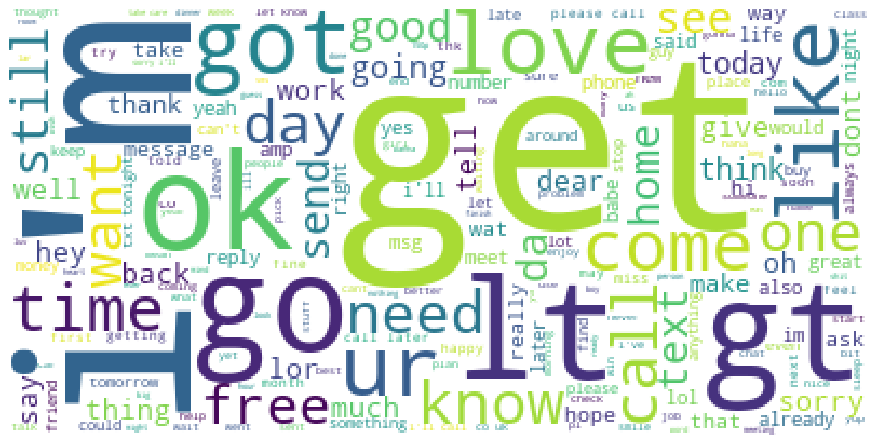

In [6]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image

wc = WordCloud(stopwords= stop, background_color= 'white').generate(str(data_clean.text))

plt.figure(figsize = (12, 6), facecolor = None) 
plt.imshow(wc)

plt.axis("off") 
plt.tight_layout(pad = 0)
plt.show()

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()

# On fit_transform 
cr_cv = cv.fit_transform(data_clean.text)
cr_dtm = pd.DataFrame(cr_cv.toarray(), columns = cv.get_feature_names())
cr_dtm.index = data_clean.target
cr_dtm = cr_dtm.groupby("target").sum()
cr_dtm.head()

00  000  000pes  008704050406  0089  0121  01223585236  01223585334  \
target                                                                        
ham     0   0    1       0             0     0     0            0             
spam    10  29   0       2             1     1     1            2             

        0125698789  02  0207  02072069400  02073162414  02085076972  021  03  \
target                                                                         
ham     1           0   0     0            0            0            0    0    
spam    0           8   3     1            2            1            2    13   

        04  0430  05  050703  0578  06  07  07008009200  07046744435  \
target                                                                 
ham     0   0     0   0       0     0   0   0            0             
spam    12  1     5   2       2     8   2   1            1             

        07090201529  07090298926  07099833605  07123456789  0721072  \
target                                                                
ham     0            0            0            0            0         
spam    1            1            1            2            1         

        07732584351  07734396839  07742676969  07753741225  0776xxxxxxx  \
target                                                                    
ham     0            0            0            0            0             
spam    1            2            2            1            2             

        07781482378  07786200117  077xxx  078  07801543489  07808  \
target                                                              
ham     0            0            0       0    0            0       
spam    2            2            1       1    1            1       

        07808247860  07808726822  07815296484  07821230901  078498  \
target                                                               
ham     0            0            0            0            0        
spam    1            1            1            2            1        

        07880867867  0789xxxxxxx  07946746291  0796xxxxxx  07973788240  \
target                                                                   
ham     0            0            0            0           0             
spam    1            1            1            1           1             

        07xxxxxxxxx  08  0800  08000407165  08000776320  08000839402  \
target                                                                 
ham     0            0   0     0            0            0             
spam    3            2   13    2            2            15            

        08000930705  08000938767  08001950382  08002888812  08002986030  \
target                                                                    
ham     0            0            0            0            0             
spam    16           3            4            2            2             

        08002986906  08002988890  08006344447  0808  08081263000  08081560665  \
target                                                                          
ham     0            0            0            0     0            0             
spam    4            1            2            4     1            2             

        0825  083  0844  08448350055  08448714184  0845  08450542832  \
target                                                                 
ham     0     0    0     0            0            0     0             
spam    2     1    2     1            1            3     1             

        08452810071  08452810073  08452810075over18  0870  08700435505150p  \
target                                                                       
ham     0            0            0                  0     0                 
spam    1            3            2                  8     1                 

        08700469649  08700621170150p  08701213186  08701237397  08701417012  \
target                                      

In [17]:
# on transpose le df pour trier par mots les plus utilisés
dtm_analyse = cr_dtm.transpose()
dtm_analyse['Sum'] = dtm_analyse.ham + dtm_analyse.spam
dtm_analyse['ratio_ham'] = round((dtm_analyse.ham / sum(dtm_analyse.ham))*100, 4)
dtm_analyse['ratio_spam'] = round((dtm_analyse.spam / sum(dtm_analyse.spam))*100, 4)
dtm_analyse['ratio_sum'] = dtm_analyse.ratio_ham + dtm_analyse.ratio_spam

dtm_analyse.sort_values(by = max(['ratio_sum']), ascending = False)

target                              ham  spam  Sum  ratio_ham  ratio_spam  \
call                                238  355   593  0.6005     2.7079       
free                                60   224   284  0.1514     1.7086       
ur                                  247  144   391  0.6232     1.0984       
get                                 305  86    391  0.7696     0.6560       
txt                                 14   163   177  0.0353     1.2433       
now                                 146  106   252  0.3684     0.8085       
text                                68   125   193  0.1716     0.9535       
stop                                37   123   160  0.0934     0.9382       
mobile                              15   127   142  0.0378     0.9687       
reply                               44   104   148  0.1110     0.7933       
go                                  252  31    283  0.6359     0.2365       
send                                129  71    200  0.3255     0.5416       
claim                               0    113   113  0.0000     0.8619       
gt                                  318  0     318  0.8024     0.0000       
lt                                  316  0     316  0.7974     0.0000       
you                                 199  38    237  0.5021     0.2899       
know                                237  25    262  0.5980     0.1907       
ok                                  288  5     293  0.7267     0.0381       
www                                 2    98    100  0.0050     0.7475       
prize                               0    93    93   0.0000     0.7094       
new                                 67   69    136  0.1691     0.5263       
like                                234  13    247  0.5904     0.0992       
day                                 212  20    232  0.5349     0.1526       
good                                235  12    247  0.5930     0.0915       
time                                202  19    221  0.5097     0.1449       
want                                165  30    195  0.4163     0.2288       
got                                 233  7     240  0.5879     0.0534       
ll                                  248  2     250  0.6258     0.0153       
week                                66   60    126  0.1665     0.4577       
please                              80   55    135  0.2019     0.4195       
cash                                12   76    88   0.0303     0.5797       
come                                230  2     232  0.5804     0.0153       
love                                205  10    215  0.5173     0.0763       
uk                                  1    74    75   0.0025     0.5645       
msg                                 57   54    111  0.1438     0.4119       
phone                               81   45    126  0.2044     0.3432       
150p                                0    71    71   0.0000     0.5416       
me                                  187  9     196  0.4719     0.0686       
nokia                               3    67    70   0.0076     0.5111       
win                                 12   64    76   0.0303     0.4882       
today                               139  21    160  0.3507     0.1602       
back                                130  23    153  0.3280     0.1754       
it                                  186  4     190  0.4693     0.0305       
see                                 140  19    159  0.3533     0.1449       
urgent                              7    63    70   0.0177     0.4805       
one                                 168  8     176  0.4239     0.0610       
need                                159  10    169  0.4012     0.0763       
no                                  74   37    111  0.1867     0.2822       
tone                                0    60    60   0.0000     0.4577       
contact                             12   56    68   0.0303     0.4272       
going                               169  4     173  0.4264     0.0305    

In [18]:
new_stopword = []

for word in dtm_analyse.index :
    if dtm_analyse['ratio_sum'][word] <= 0.0027 :
        new_stopword.append(word)


In [20]:
# On fusionne les 2 listes de stopword
stop = stop + new_stopword

In [21]:
cv = CountVectorizer(stop_words= stop)

# On fit_transform 
cr_cv = cv.fit_transform(data_clean.text)
cr_dtm = pd.DataFrame(cr_cv.toarray(), columns = cv.get_feature_names())
cr_dtm.index = data_clean.target
cr_dtm = cr_dtm.groupby("target").sum()
cr_dtm.head()

00  000  008704050406  0089  0121  01223585236  01223585334  02  0207  \
target                                                                          
ham     0   0    0             0     0     0            0            0   0      
spam    10  29   2             1     1     1            2            8   3      

        02072069400  02073162414  02085076972  021  03  04  0430  05  050703  \
target                                                                         
ham     0            0            0            0    0   0   0     0   0        
spam    1            2            1            2    13  12  1     5   2        

        0578  06  07  07008009200  07046744435  07090201529  07090298926  \
target                                                                     
ham     0     0   0   0            0            0            0             
spam    2     8   2   1            1            1            1             

        07099833605  07123456789  0721072  07732584351  07734396839  \
target                                                                
ham     0            0            0        0            0             
spam    1            2            1        1            2             

        07742676969  07753741225  0776xxxxxxx  07781482378  07786200117  \
target                                                                    
ham     0            0            0            0            0             
spam    2            1            2            2            2             

        077xxx  078  07801543489  07808  07808247860  07808726822  \
target                                                              
ham     0       0    0            0      0            0             
spam    1       1    1            1      1            1             

        07815296484  07821230901  078498  07880867867  0789xxxxxxx  \
target                                                               
ham     0            0            0       0            0             
spam    1            2            1       1            1             

        07946746291  0796xxxxxx  07973788240  07xxxxxxxxx  08  0800  \
target                                                                
ham     0            0           0            0            0   0      
spam    1            1           1            3            2   13     

        08000407165  08000776320  08000839402  08000930705  08000938767  \
target                                                                    
ham     0            0            0            0            0             
spam    2            2            15           16           3             

        08001950382  08002888812  08002986030  08002986906  08002988890  \
target                                                                    
ham     0            0            0            0            0             
spam    4            2            2            4            1             

        08006344447  0808  08081263000  08081560665  0825  083  0844  \
target                                                                 
ham     0            0     0            0            0     0    0      
spam    2            4     1            2            2     1    2      

        08448350055  08448714184  0845  08450542832  08452810071  08452810073  \
target                                                                          
ham     0            0            0     0            0            0             
spam    1            1            3     1            1            3             

        08452810075over18  0870  08700435505150p  08700469649  \
target                                                          
ham     0                  0     0                0             
spam    2                  8     1                1             

        08700621170150p  08701213186  08701237397  08701417012  \
target                                                           
ham     0          

- Faites un nuage de mots par catégorie pour bien illustrer les différences des mots utilisés entre spam et non spam.

In [22]:
data_cl_spam = data_clean[data_clean['target'] == 'spam']
data_cl_ham = data_clean[data_clean['target'] == 'ham']

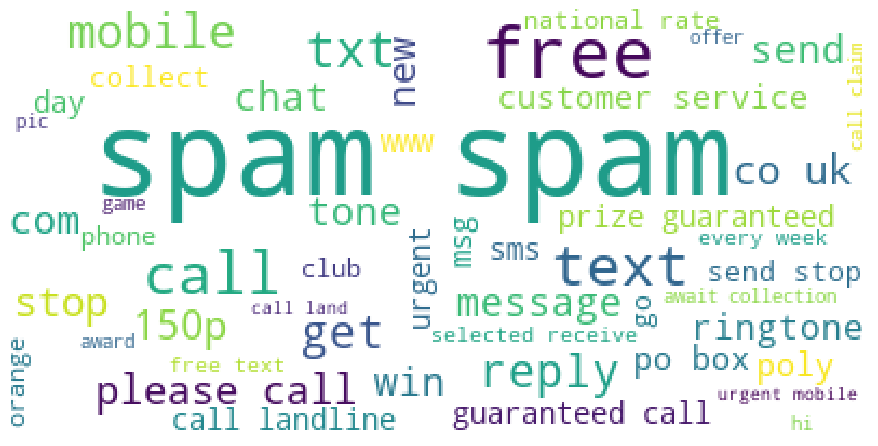

In [23]:
wc_ham = WordCloud(stopwords= stop, background_color= 'white', max_words= 50).generate(str(data_cl_spam))

plt.figure(figsize = (12, 6), facecolor = None) 
plt.imshow(wc_ham)

plt.axis("off") 
plt.tight_layout(pad = 0)
plt.show()

In [24]:
def  second_clean(df, text_field):
    df[text_field] = df[text_field].apply(lambda elem: re.sub(r'\b[0-9]{1,10}\w*', ' ', elem))
    
    return df

data_clean = second_clean(data_clean, "text")

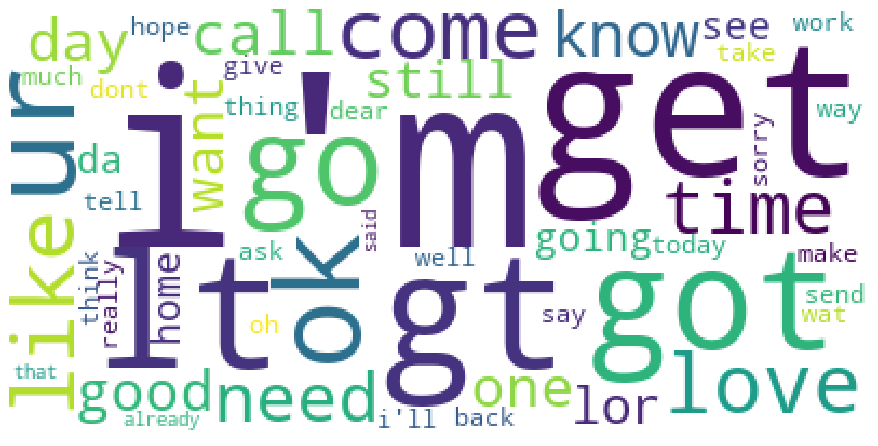

In [25]:
data_cl_ham = data_clean[data_clean['target'] == 'ham']
ham_txt = ''.join(data_cl_ham.text)

wc_ham = WordCloud(stopwords= stop, background_color= 'white', max_words= 50).generate(ham_txt)

plt.figure(figsize = (12, 6), facecolor = None) 
plt.imshow(wc_ham)

plt.axis("off") 
plt.tight_layout(pad = 0)
plt.show()

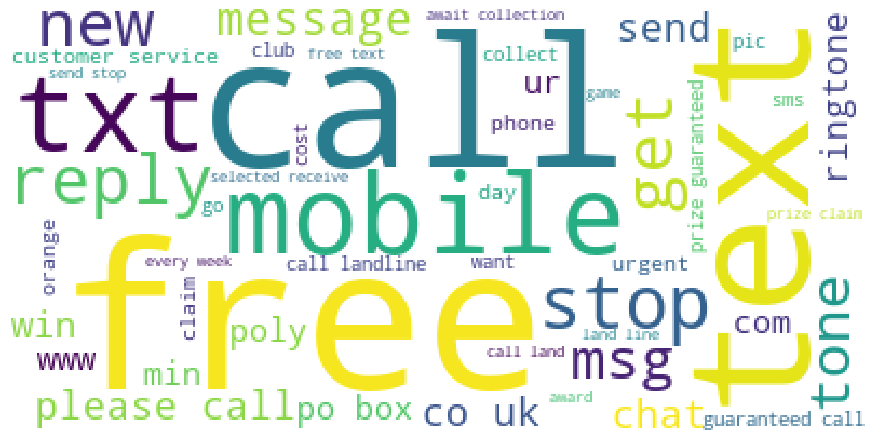

In [373]:
data_cl_spam = data_clean[data_clean['target'] == 'spam']
spam_txt = ''.join(data_cl_spam.text)

wc_spam = WordCloud(stopwords= stop, background_color= 'white', max_words= 50).generate(spam_txt)

plt.figure(figsize = (12, 6), facecolor = None) 
plt.imshow(wc_spam)

plt.axis("off") 
plt.tight_layout(pad = 0)
plt.show()

- À partir de la matrice de termes réduite, entraînez un modèle de forêts aléatoires permettant de prédire si un texto est un spam ou non 

In [26]:
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(data_clean['text'],
                                                   data_clean['target'])

# Dans le pipeline, on compte le nombre d'occurence de chaque mot via CountVectorizer.
# On assigne un poid à chaque occurence avec TfidfTransformer
# Puis on entraîne le modèle RandomForest
pipeline_randomRor = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf',  TfidfTransformer()),
    ('rf', RandomForestClassifier()),
])

model = pipeline_randomRor.fit(X_train, y_train)

In [27]:
y_predict = model.predict(X_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         ham       0.97      1.00      0.99      1190
        spam       1.00      0.82      0.90       203

    accuracy                           0.97      1393
   macro avg       0.99      0.91      0.94      1393
weighted avg       0.97      0.97      0.97      1393



In [30]:
# On essaie plusieurs modèles pour regarder le plus performant
import datetime
import time
from time import strftime
from time import gmtime

models = {'KNN' : KNeighborsClassifier(n_neighbors = 10),
          'RandomForest' : RandomForestClassifier(),
          'DecisionTree' : DecisionTreeClassifier(),
          'SGDClassifier' : SGDClassifier()
         }

model_list = []
model_list = []
runtime_list = []
scor_list = []
csv_list = []

for k, v in models.items() :
    
    t0 = time.time() 
    
    model = v
    
    pipeline = Pipeline([
        ('vect', CountVectorizer()),
        ('tfidf',  TfidfTransformer()),
        ('model', model),
        ])


    model = pipeline.fit(X_train, y_train)
    runtime = time.time() - t0

    model_list.append(k)
    runtime_list.append(strftime("%H:%M:%S", gmtime(runtime)))

    # Score
    scor = model.score(X_train, y_train)
    scor_list.append(round(scor, 4))

    y_predict = model.predict(X_test)
    
    print("--------------------------")    
    print(k)
    print(classification_report(y_test, y_predict))
    print(f"Le modèle {k} est terminé")
    print("--------------------------")

--------------------------
KNN
              precision    recall  f1-score   support

         ham       0.87      1.00      0.93      1190
        spam       1.00      0.14      0.25       203

    accuracy                           0.88      1393
   macro avg       0.94      0.57      0.59      1393
weighted avg       0.89      0.88      0.83      1393

Le modèle KNN est terminé
--------------------------
--------------------------
RandomForest
              precision    recall  f1-score   support

         ham       0.97      1.00      0.99      1190
        spam       1.00      0.83      0.91       203

    accuracy                           0.98      1393
   macro avg       0.99      0.92      0.95      1393
weighted avg       0.98      0.98      0.97      1393

Le modèle RandomForest est terminé
--------------------------
--------------------------
DecisionTree
              precision    recall  f1-score   support

         ham       0.97      0.98      0.98      1190
        spa

In [31]:
from time import gmtime

# On affiche les résultats dans un tableau pour comparer les modèles
result = pd.DataFrame({'Model ' : model_list,
                       'Accuracy Score' : scor_list})
result

Model   Accuracy Score
0  KNN            0.9072        
1  RandomForest   0.9998        
2  DecisionTree   0.9998        
3  SGDClassifier  0.9988

- Essayez d'améliorer la prédiction de votre modèle en ajoutant une analyse en composantes principales en amont.

In [34]:
from sklearn.decomposition import PCA

# On a besoin de récupérer le df du début sans le groupby
cr_dtm2 = pd.DataFrame(cr_cv.toarray(), columns = cv.get_feature_names())
cr_dtm2.index = data_clean.target

X_train2, X_test2, y_train2, y_test2 = train_test_split(cr_dtm2,
                                                   sms.target)
pca = PCA(0.95).fit(X_train2)
X_train_pca = pca.transform(X_train2)
X_test_pca = pca.transform(X_test2)

In [35]:
pca.n_components_

1396

In [36]:
# On compare 4 modèles une fois le PCA appliqué
models = {'KNN' : KNeighborsClassifier(n_neighbors = 10),
          'RandomForest' : RandomForestClassifier(),
          'DecisionTree' : DecisionTreeClassifier(),
          'SGDClassifier' : SGDClassifier()
         }

model_list = []
model_list = []
runtime_list = []
scor_list = []
csv_list = []

for k, v in models.items() :
    
    t0 = time.time() 
    
    model = v

    model = model.fit(X_train_pca, y_train2)
    runtime = time.time() - t0

    model_list.append(k)
    runtime_list.append(strftime("%H:%M:%S", gmtime(runtime)))

    # Score
    scor = model.score(X_train_pca, y_train)
    scor_list.append(round(scor, 4))

    y_predict = model.predict(X_test_pca)
    
    print("--------------------------")    
    print(k)
    print(classification_report(y_test2, y_predict))
    print(f"Le modèle {k} est terminé")
    print("--------------------------")

--------------------------
KNN
              precision    recall  f1-score   support

         ham       0.89      1.00      0.94      1213
        spam       1.00      0.18      0.30       180

    accuracy                           0.89      1393
   macro avg       0.95      0.59      0.62      1393
weighted avg       0.91      0.89      0.86      1393

Le modèle KNN est terminé
--------------------------
--------------------------
RandomForest
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1213
        spam       0.96      0.69      0.80       180

    accuracy                           0.96      1393
   macro avg       0.96      0.84      0.89      1393
weighted avg       0.96      0.96      0.95      1393

Le modèle RandomForest est terminé
--------------------------
--------------------------
DecisionTree
              precision    recall  f1-score   support

         ham       0.97      0.97      0.97      1213
        spa

In [37]:
result = pd.DataFrame({'Model ' : model_list,
                       'Run time' : runtime_list,
                       'Accuracy Score' : scor_list})
result

Model   Run time  Accuracy Score
0  KNN            00:00:01  0.8480        
1  RandomForest   00:00:24  0.7688        
2  DecisionTree   00:00:12  0.7688        
3  SGDClassifier  00:00:00  0.7693

On peut imaginer que pour une entreprise qui développe cette solution, on souhaite plus à minimiser l'erreur consistant à définir comme spam un texto qui n'en est pas un (erreur de type 1, "faux positif") plutôt que de rater quelques spams : 
- Utilisez votre dernier modèle pour prédire des probabilités que le texto soit un spam. À partir de quelle valeur de cette probabilité notre modèle ne classe aucun non spam en spam?

In [41]:
pipeline_randomRor2 = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf',  TfidfTransformer()),
    ('rf', RandomForestClassifier()),
])

model2 = pipeline_randomRor2.fit(X_train, y_train)

In [42]:
y_predict2 = model2.predict(X_test)

In [43]:
# On affiche notre tableau de prédiction que l'o peut comparer avec nos targets
submission_df_1 = pd.DataFrame({
    "target": y_predict,
    "result": y_test})
submission_df_1.head()

target result
216   ham    ham  
4621  ham    ham  
3141  ham    spam 
4577  ham    spam 
1516  ham    ham

In [44]:
# puis on affiche une matrice de confusion pour observer le nombre de vrai ham prédit en spam
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict2)

cm = pd.DataFrame(cm, columns = ['Prédit ' + str(_) for _ in model.classes_])
cm.index = ['vrai ' + str(_) for _ in model.classes_]
cm

Prédit ham  Prédit spam
vrai ham   1190        0          
vrai spam  35          168

Comme demandé plus haut, l'entreprise ne souhaite pas que de vrais mails soient classés en tant que spam.  
Notre modèle prédit 0 bon mail en spam. L'objectif est donc atteint.  
Cependant, il reste de vrai spam classés en mails autorisés. Mais le ratio est faible.